# <div style="text-align: center;">Problem Statement</div>
---
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
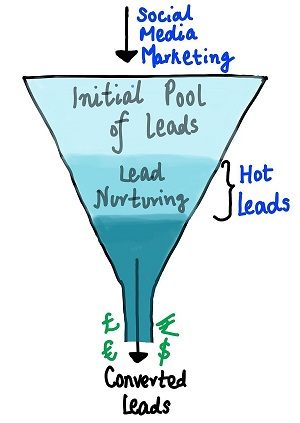

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

# <div style="text-align: center;">Business Goal</div>
---
**What company wants from us?**

The company aims to optimize lead conversion by implementing a lead scoring model. This model will assign each lead a score reflecting its likelihood of converting into a paying customer. Leads with higher scores are anticipated to have a greater probability of conversion, while those with lower scores are expected to have a lower probability. The CEO has set a target lead conversion rate of approximately 80%, guiding the development of the lead scoring model.

# <div style="text-align: center;">1. Import Required Libraries:</div>
---

In [1]:
# Import maths and Analysis tools:
import numpy as np
import pandas as pd

# Import Visualization tools:
import seaborn as sns
import matplotlib.pyplot as plt

# Import Warnings:
import warnings
warnings.filterwarnings('ignore')

# Import Sklearn Liberaries:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve

# Import Statsmodel liberaries:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# <div style="text-align: center;">2. Read and Understand Data:</div>
---

In [2]:
# Stop column truncation
pd.set_option("display.max_columns", None)

# Read data
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- Right Now there is no chance of finding duplicate rows in the dataset because of the unique "Prospect ID".
- We have to remove Prospect ID and Lead Number columns because it has all unique values.

In [3]:
# Drop Prospect ID and Lead Number columns
lead_data.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)

In [4]:
# Check the shape of data and the column names:
print(lead_data.shape)
print("\n Columns: \n", lead_data.columns.tolist())

(9240, 35)

 Columns: 
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


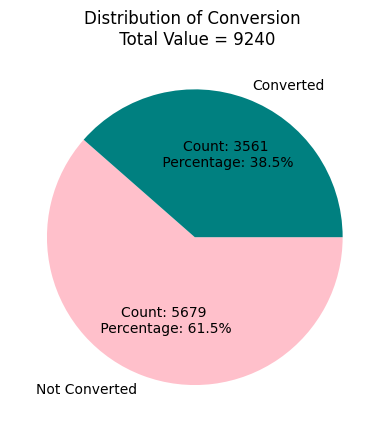

In [5]:
# check for the data Imbalance by ploting pie chart
plt.pie(lead_data.Converted.value_counts(), labels=['Not Converted', 'Converted'],
        autopct=lambda p: 'Count: {:.0f}\n Percentage: {:.1f}%'.format(p * lead_data.Converted.value_counts().sum()/100, p),
        colors=['pink', 'teal'], counterclock=False)
plt.title(f"Distribution of Conversion \n Total Value = {lead_data.Converted.value_counts().sum()}")
plt.show()

In [6]:
# Check for the info of the columns
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [7]:
# Descriptive Analysis
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# <div style="text-align: center;">3. Data Cleaning:</div>
---

In [8]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 3.1. Handle columns which has 'Select' as values:
As mentioned in the Problem Statement, many of the categorical variables have a value called **'Select'**, which needs to be handled because it is as good as a null value.

In [9]:
# There are few columns which has select in it we need to convert them to NA data.
# Select means User has not chosen any thing in the dropdown shown to them.

# Filter only object (string) columns
object_columns = lead_data.select_dtypes(include='object')

# Define the keyword to search for
keyword = 'Select'

# Find columns containing the keyword
columns_with_select = object_columns.apply(lambda col: col.str.contains(keyword, case=False, na=False)).any()
selected_columns = columns_with_select[columns_with_select].index.tolist()

# Now change 'SELECT' to 'NULL' in columns
for col in selected_columns:
    lead_data[col] = lead_data[col].replace('Select', np.nan)

### 3.2. Handling Missing Values:

In [10]:
# Check for the missing values in the columns in percentage
percentage_null = round(lead_data.isnull().mean()*100, 2).sort_values(ascending=False)
percentage_null = percentage_null[percentage_null>0]
percentage_null

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

**Note:** Remove all the columns which has more than 25% of missing datas in it.

**Reasons:** Imputing missing values with the most frequent data in columns already characterized by high data imbalance risks further exacerbating this issue. Such an approach may reinforce the dominance of already prevalent values, potentially distorting the dataset's representation and skewing analytical outcomes.

In [11]:
# Remove all the columns which has more than 25% of missing data in it
for col in percentage_null.keys():
    if percentage_null[col] > 25:
        lead_data.drop(columns=col, inplace=True)

In [12]:
# For remaining columns fill the missing values using mode
for col in percentage_null.keys():
    if percentage_null[col] < 25:
        mode = lead_data[col].mode()[0]
        lead_data[col].fillna(value=mode, inplace=True)

In [13]:
lead_data.shape

(9240, 22)

### 3.3 Handling Skewed Columns
1. Remove columns with only one value Yes/No
2. Remove high imbalanced columns which has only few Yes

In [14]:
# Check for the distribution of values in columns with dtype object.
lead_data.describe(include='object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,5,21,2,2,17,2,1,2,2,2,2,2,1,1,1,1,2,16
top,Landing Page Submission,Google,No,No,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,4886,2904,8506,9238,3540,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


In [15]:
# Remove all the columns with data imbalance:
lead_data.drop(columns=['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                       'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                       'Update me on Supply Chain Content', 'Get updates on DM Content', 
                        'I agree to pay the amount through cheque'], inplace=True)

In [16]:
# Check for the counts in the string columns:
for col in lead_data.columns:
    if lead_data[col].dtype == 'object':
        print(lead_data[col].value_counts())
        print(f"\n{'-'*60}\n")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

------------------------------------------------------------

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

------------------------------------------------------------

No     8506
Yes     734
Name: Do Not Email, dtype: int64

----------------------------------------------

- **Note: Lead Source**, in this we have to narrow down the list.

- We are going to remove this column **Last Activity** and keep **Last Notable Activity**.

#### Understand the column LEAD SOURCE
**1. Google:** Traffic originating from Google search, both paid (Google Ads) and organic.

**2. Direct Traffic:** Visitors who arrived at your site by typing the URL directly into their browser or via bookmarks.

**3. Olark Chat:** Visitors who interacted with your site through the Olark live chat widget.

**4. Organic Search:** Visitors who found your site through non-paid search engine results.

**5. Reference:** Traffic coming from other websites that link to your site.

**6. Welingak Website:** Traffic coming specifically from the Welingak (likely a specific site or campaign) website.

**7. Referral Sites:** Similar to reference, this includes visitors who came from other websites.

**8. Facebook:** Traffic from Facebook, including posts, ads, and shared links.

**9. bing:** Traffic originating from Bing search engine, both paid and organic.

**10. google:** Another entry for Google, possibly meant to distinguish between different types of Google traffic or a duplicate.

**11. Click2call:** Visitors who interacted with a click-to-call feature, which allows users to call a business directly from a web page or ad.

**12. Press_Release:** Traffic generated from press releases distributed online.

**13. Social Media:** General category for traffic from various social media platforms.

**14. Live Chat:** Visitors who interacted with any live chat functionality on the site.

**15. youtubechannel:** Traffic coming from a YouTube channel, possibly from video descriptions, comments, or channel links.

**16. testone:** This might be a test or placeholder category, possibly used for testing purposes.

**17. Pay per Click Ads:** Traffic from paid search ads or other pay-per-click advertising campaigns.

**18. welearnblog_Home:** Traffic from a specific blog named WeLearn or a similar initiative.

**19. WeLearn:** Traffic from a site, platform, or campaign named WeLearn.

**20. blog:** General traffic from blog posts, possibly your own blog or guest posts on other blogs.

**21. NC_EDM:** Likely an email marketing campaign, where EDM stands for Electronic Direct Mail, and NC could be a campaign identifier or source.

In [17]:
# Replace 'Google', 'google', 'bing' with Search Engines:
lead_data['Lead Source'].replace(['Google', 'google', 'bing'], 'Search Engine', inplace=True)

# Replace 'Facebook', 'youtubechannel' with Social Media:
lead_data['Lead Source'].replace(['Facebook', 'youtubechannel'], 'Social Media', inplace=True)

# Replace 'Olark Chat', 'Live Chat' with Messaging:
lead_data['Lead Source'].replace(['Olark Chat', 'Live Chat'], 'Messaging', inplace=True)

# Replace 'Reference', 'Referral Sites' with Referrals:
lead_data['Lead Source'].replace(['Reference', 'Referral Sites'], 'Referrals', inplace=True)

# Replace 'Welingak Website', 'WeLearn', 'welearnblog_Home', 'blog' with Campaigns:
lead_data['Lead Source'].replace(['Welingak Website', 'WeLearn', 'welearnblog_Home', 'blog'], 'Campaigns', inplace=True)

# Replace 'Pay per Click Ads', 'Press_Release' with Advertising:
lead_data['Lead Source'].replace(['Pay per Click Ads', 'Press_Release'], 'Advertising', inplace=True)

# Replace 'Click2call', 'testone', 'NC_EDM' with Miscellaneous:
lead_data['Lead Source'].replace(['Click2call', 'testone', 'NC_EDM'], 'Miscellaneous', inplace=True)

In [18]:
# Drop Last Activity Column:
lead_data.drop(columns='Last Activity', inplace=True)

In [19]:
# Check for the shape of data:
lead_data.shape

(9240, 9)

* Now we are done with the initial level data cleaning process now it's time to visualise the data and do the required changements on the data.

# <div style="text-align: center;">4. Exploratory Data Analysis:</div>
---
1. Univariate Analysis
2. Bivariate / Multivariate Analysis

In [20]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity
0,API,Messaging,No,0,0.0,0,0.0,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,No,Modified
4,Landing Page Submission,Search Engine,No,1,2.0,1428,1.0,No,Modified


### 4.1 Univariate Analysis:

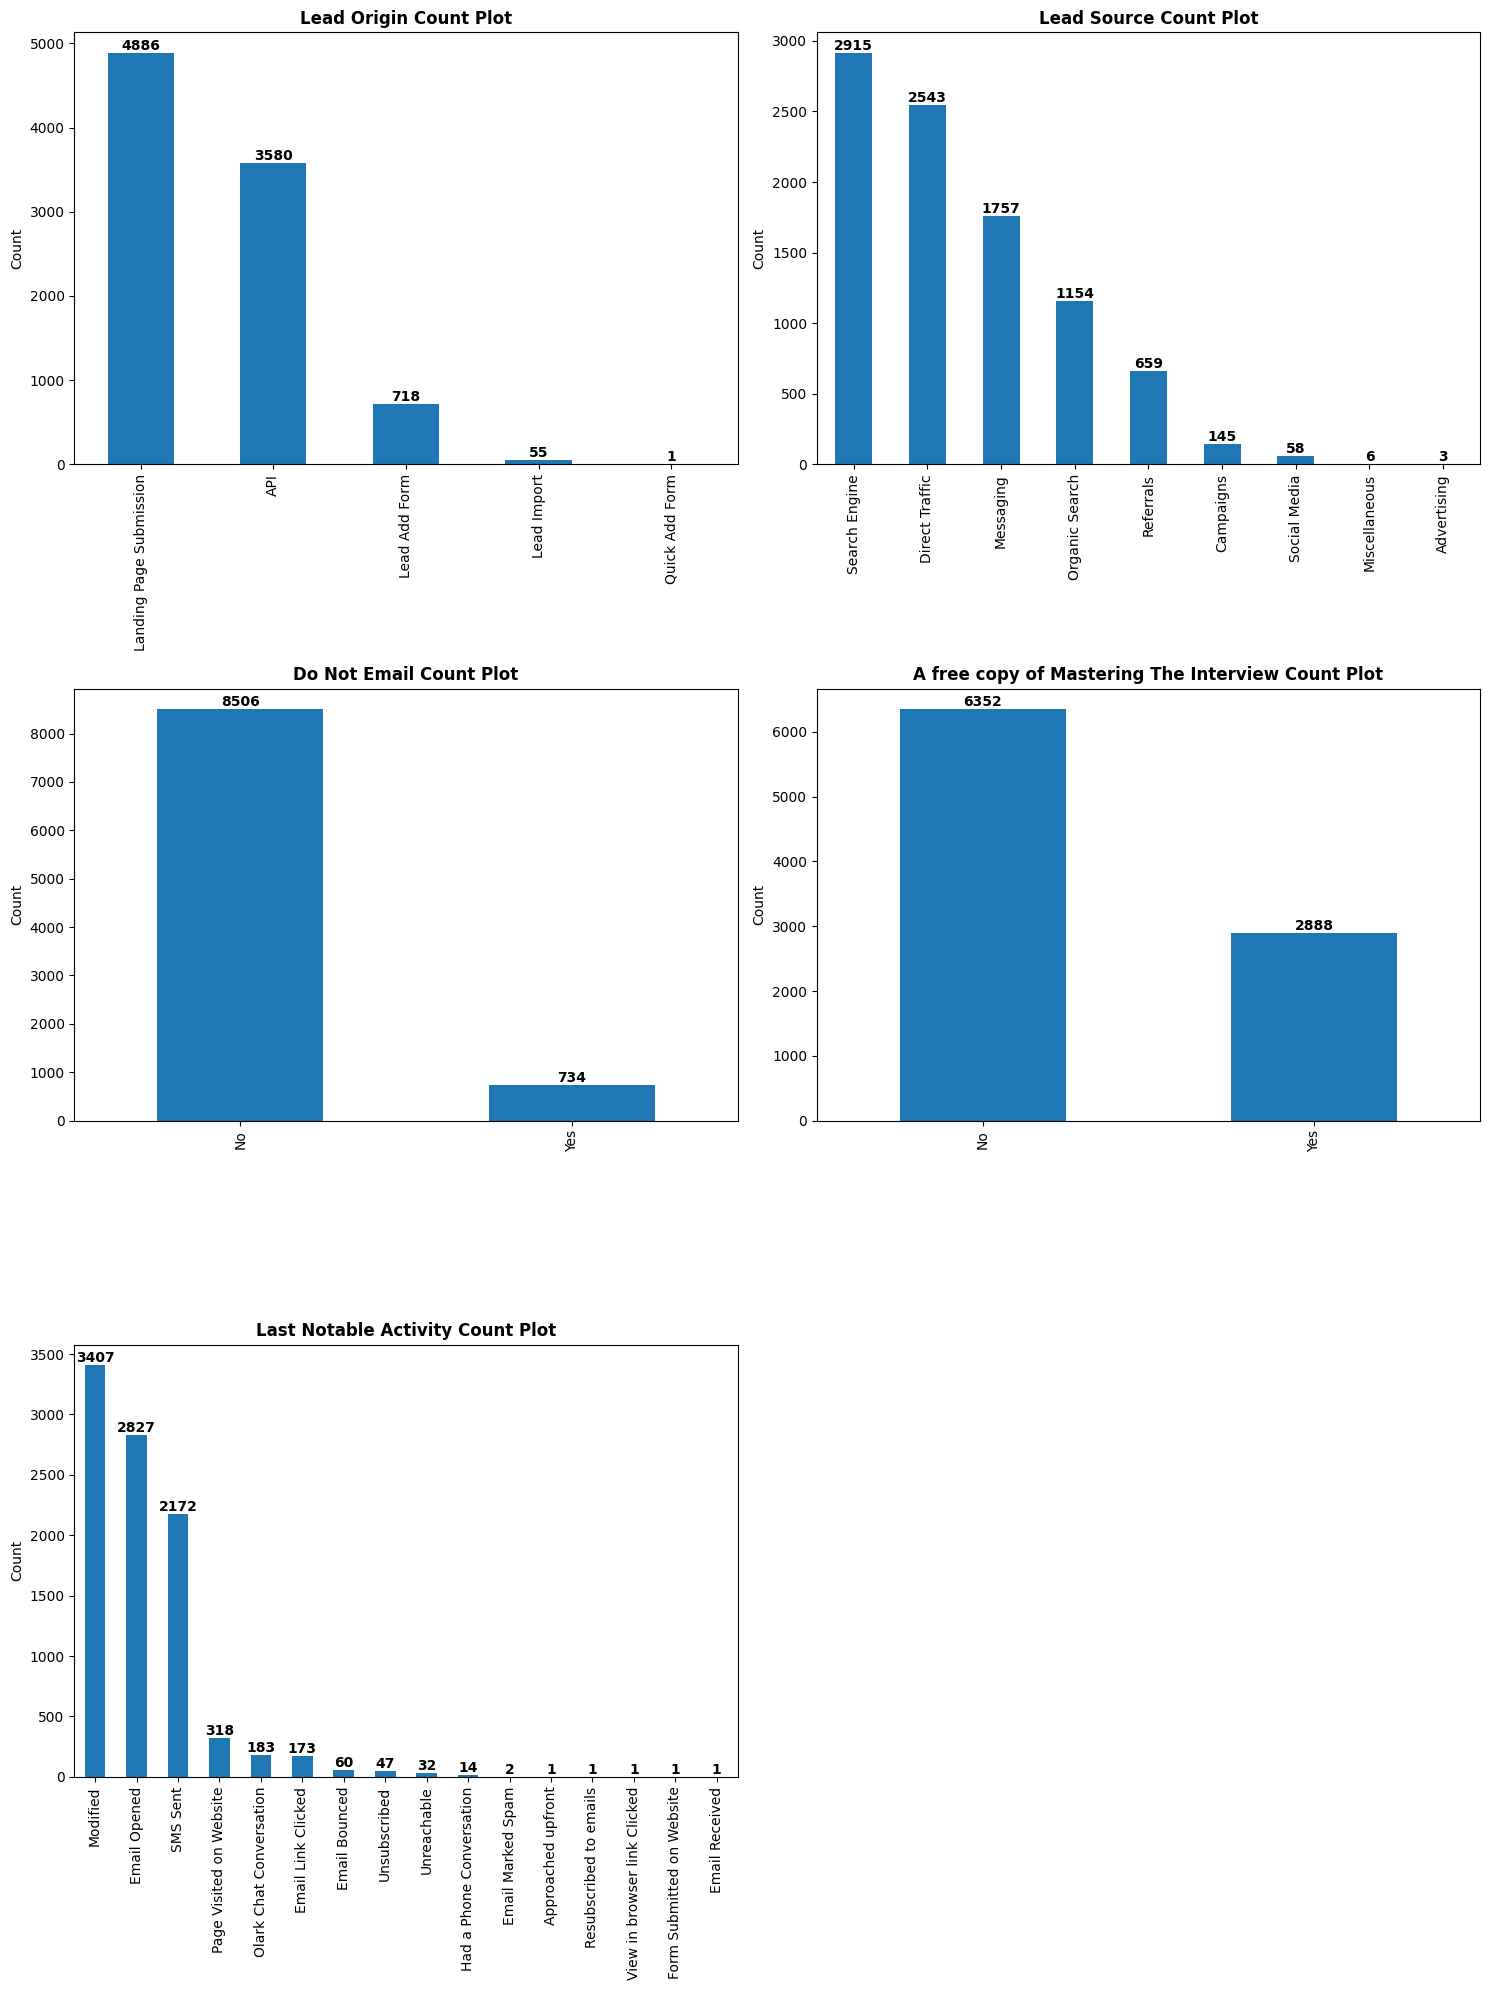

In [21]:
# Lets visualize the univariate plots for string columns:
columns = [col for col in lead_data.columns if lead_data[col].dtype=='object']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

# Plot each string column:
for idx, col in enumerate(columns):
    if idx < len(axes):
        count = lead_data[col].value_counts()
        count.plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f"{col} Count Plot",fontweight='bold')
        axes[idx].set_ylabel('Count')
    
    # Show Counts on top of the bars:
    for i, j in enumerate(count):
        axes[idx].text(x=i, y=j, s=j, fontweight='bold', ha='center', va='bottom')

# Hide any unused subplots
for idx in range(len(columns), len(axes)):
    fig.delaxes(axes[idx])
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Note:**
- Most of the users lead is generated from landing page submission.
- Most of the lead sources are from Search Engines and Direct Traffic.
- Only few users are taking a free copy of mastering the interview course.

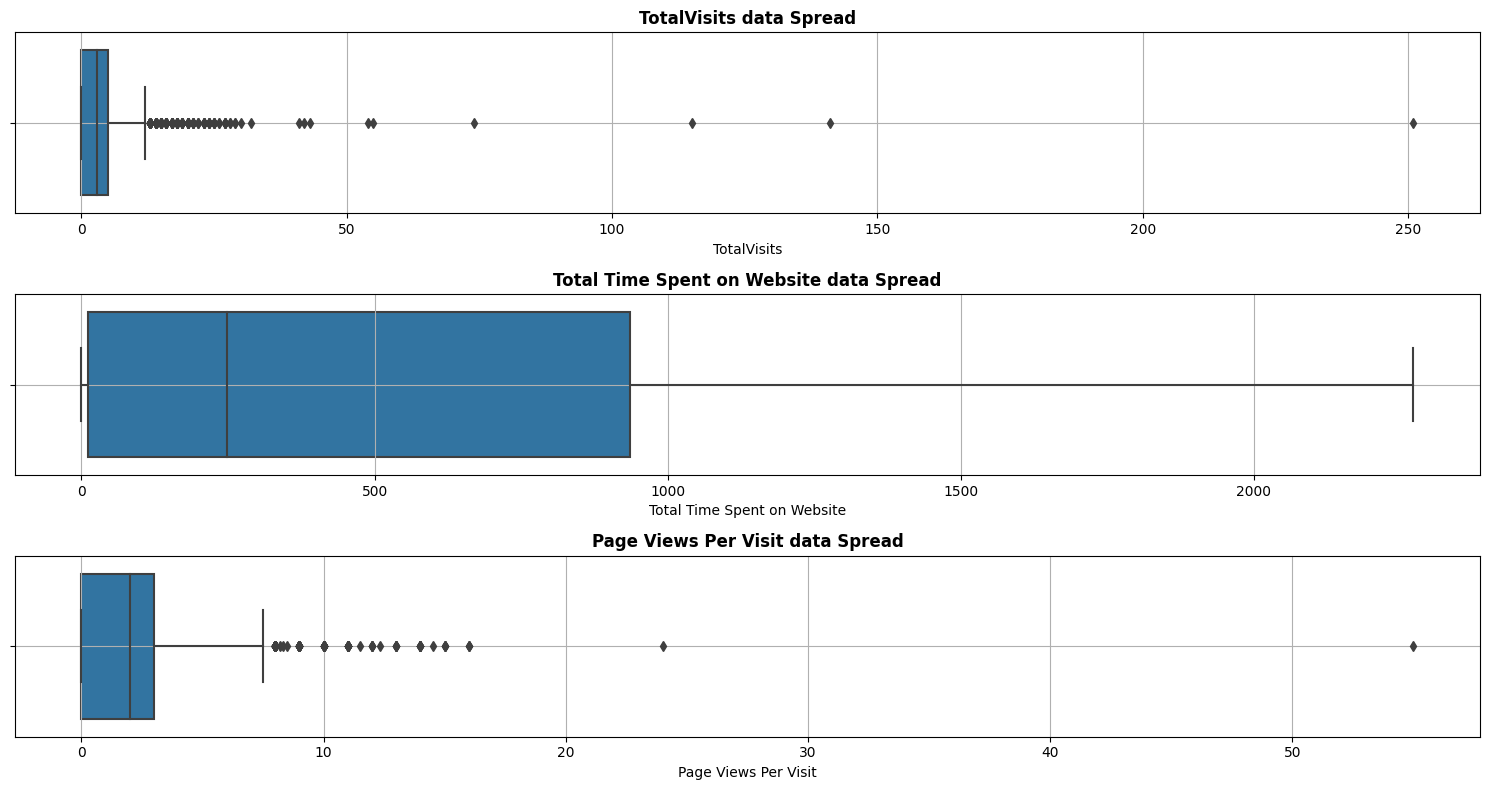

In [22]:
# Now check the distribution of numerical columns using bar plots:
columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 8))

for idx, col in enumerate(columns):
    sns.boxplot(x=lead_data[col], ax=axes[idx])
    axes[idx].set_title(f"{col} data Spread", fontweight='bold')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

**Note:** Distribution of "Total Time Spent on website" is correct but the distribution of other two columns needs to be fixed.

In [23]:
# Fix both the columns and cap the outliers to the upper bound
columns = ['TotalVisits', 'Page Views Per Visit']
for col in columns:
    q1 = np.percentile(lead_data[col], 25)
    q3 = np.percentile(lead_data[col], 75)
    iqr = q3-q1
    upper_bound = q3 + 1.5 * iqr
    lead_data[col] = np.where(lead_data[col] > upper_bound, upper_bound, lead_data[col])

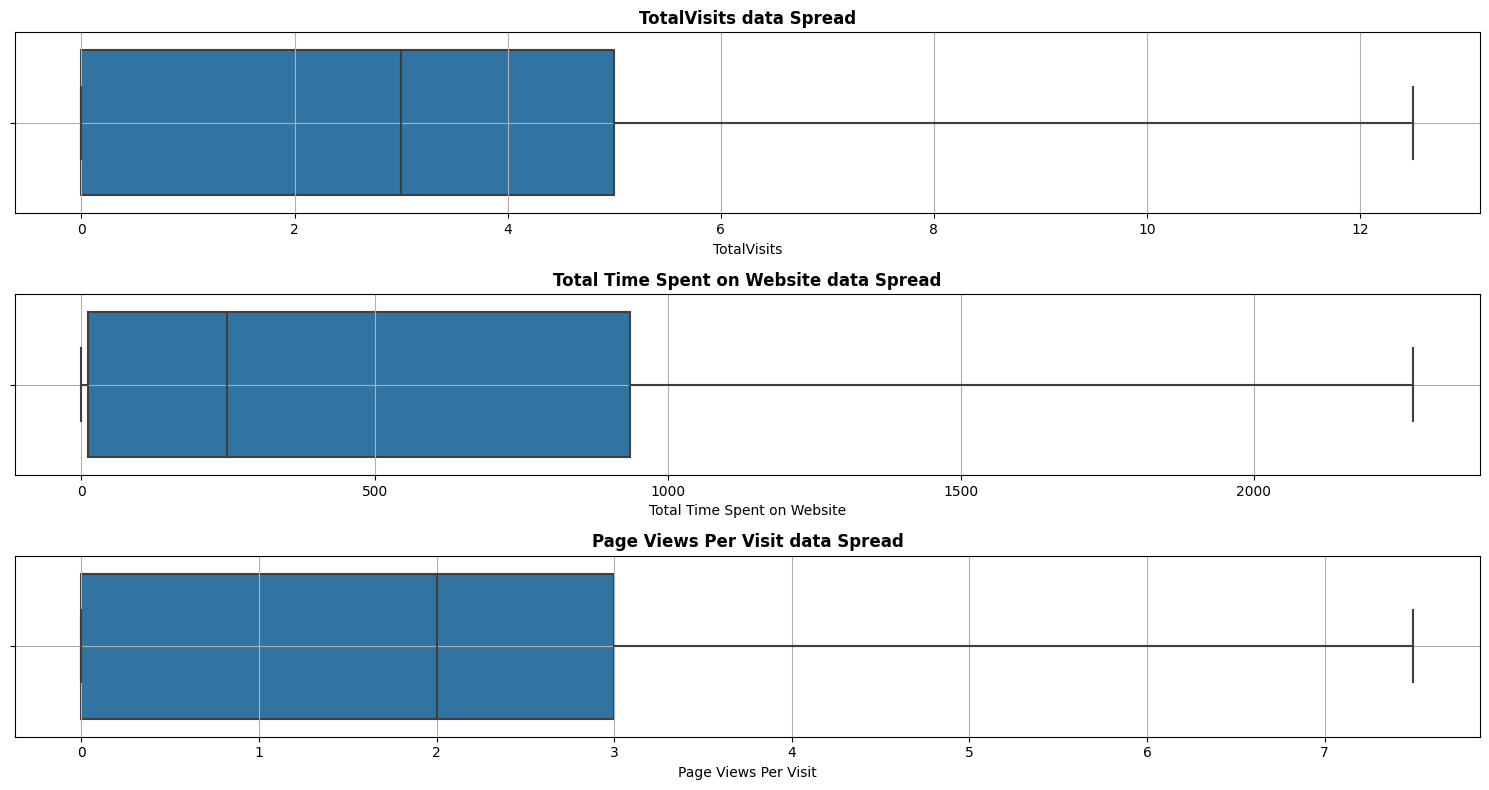

In [24]:
# Now recheck the distribution of numerical columns using box plots:
columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 8))

for idx, col in enumerate(columns):
    sns.boxplot(x=lead_data[col], ax=axes[idx])
    axes[idx].set_title(f"{col} data Spread", fontweight='bold')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

### 4.2 Bivariate/Multivariate Analysis:

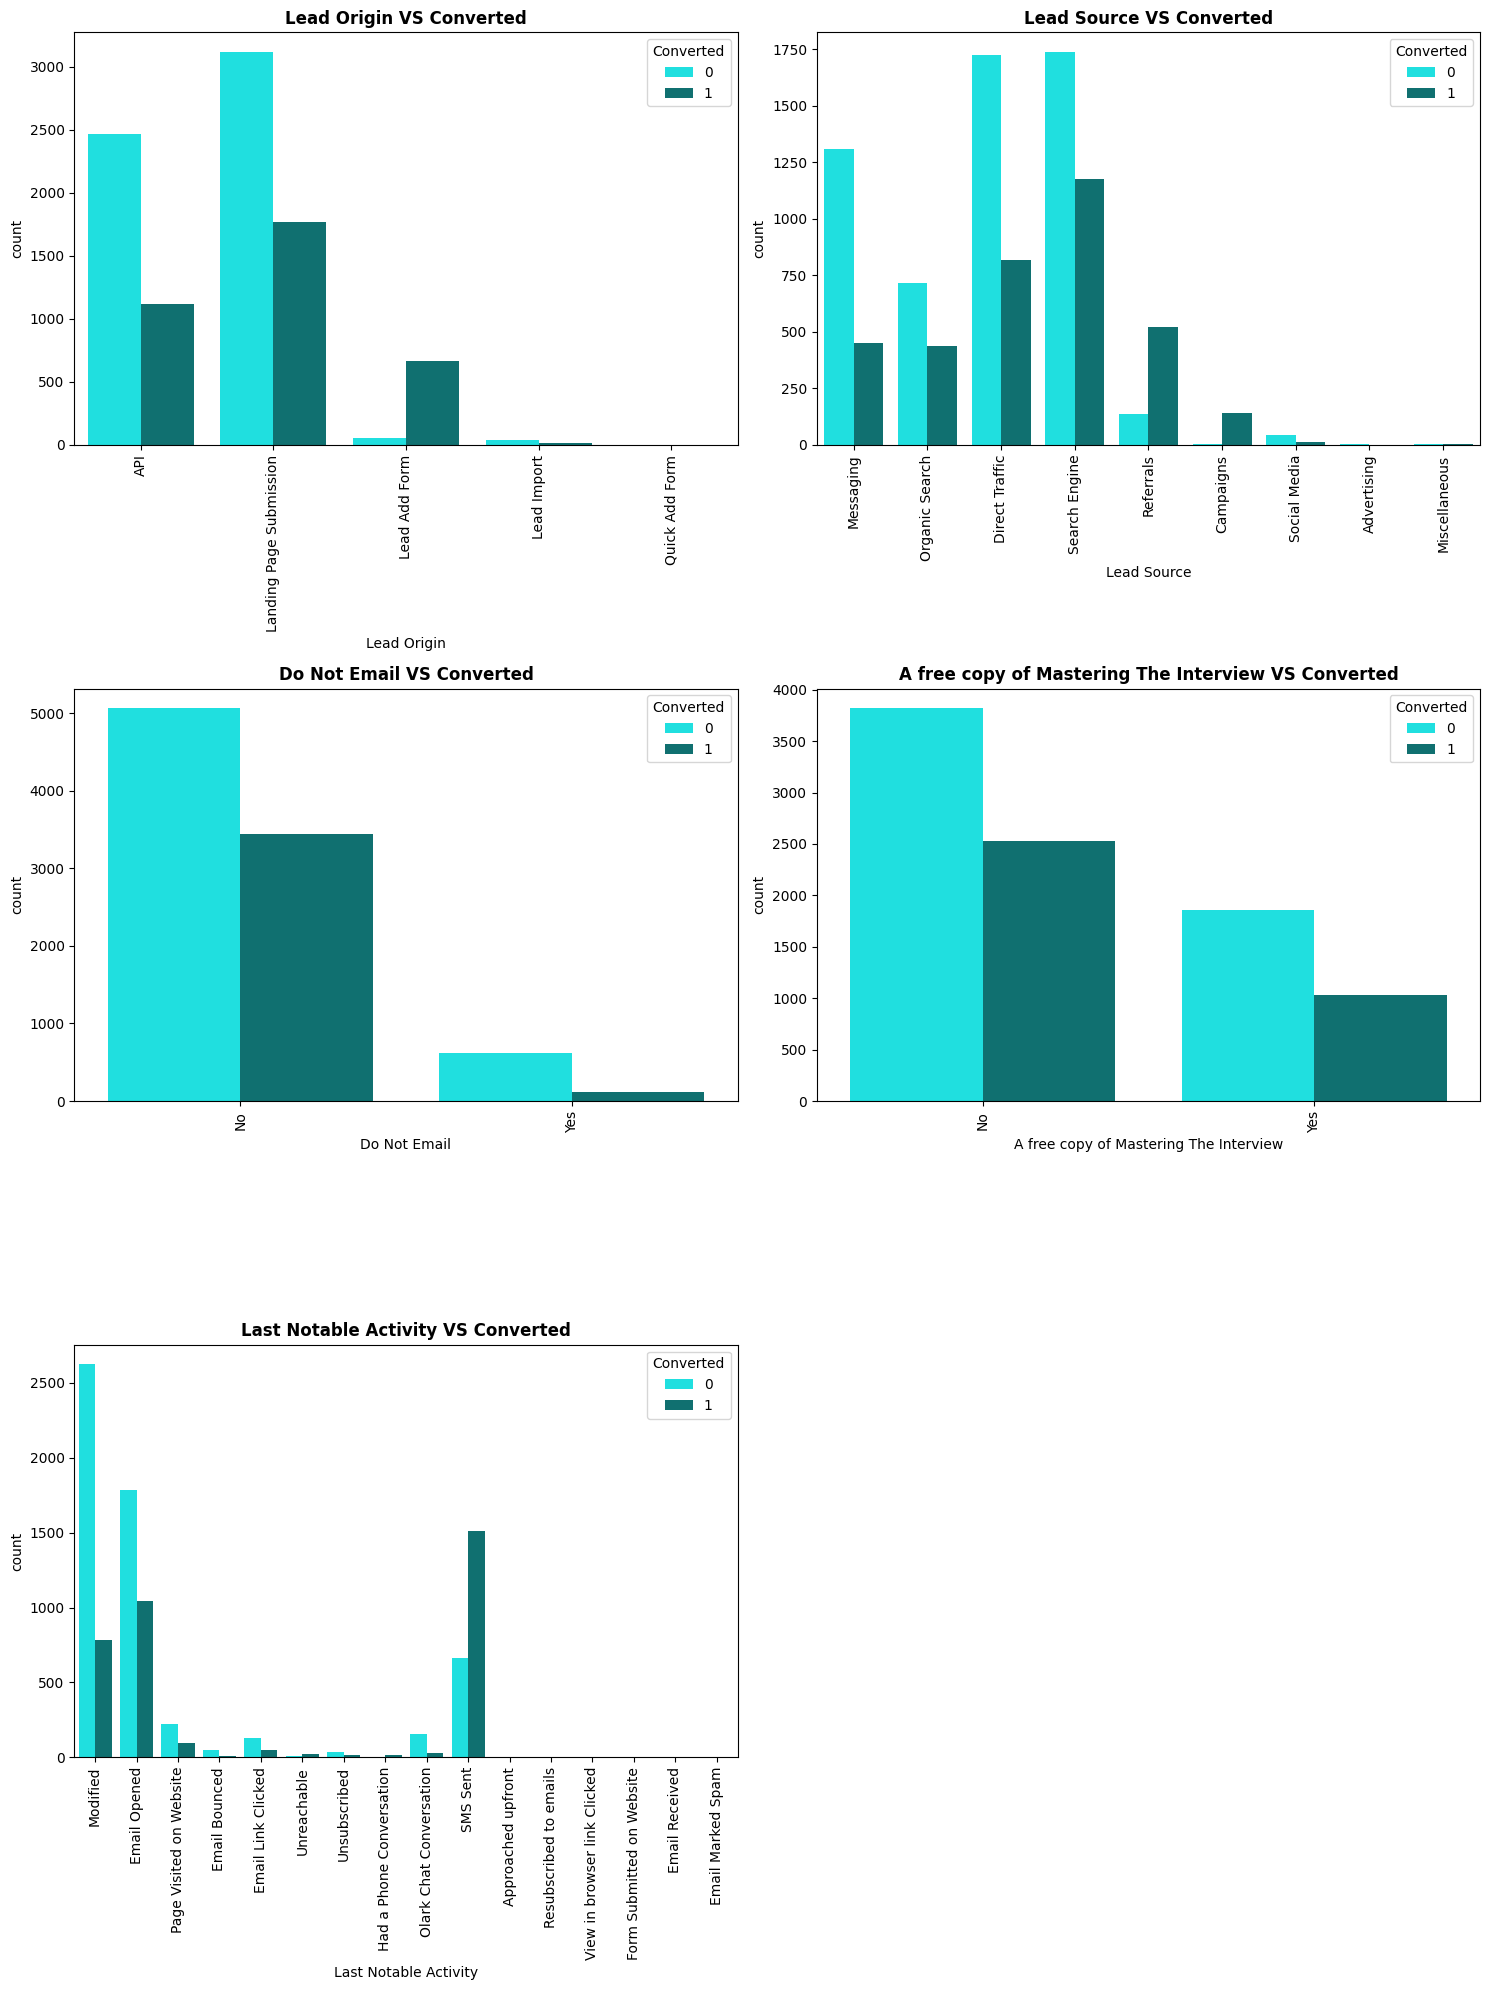

In [25]:
columns = [col for col in lead_data.columns if lead_data[col].dtype=='object']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()
for idx, col in enumerate(columns):
    sns.countplot(data=lead_data, x=col, hue='Converted', ax=axes[idx], palette=['cyan', 'teal'])
    axes[idx].set_title(f"{col} VS Converted", fontweight='bold')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=90)
    
# Hide any unused subplots
for idx in range(len(columns), len(axes)):
    fig.delaxes(axes[idx])
                
plt.tight_layout()
plt.show()

**Note:**
- Rate of conversion is maximun if lead is generated from Add forms.
- Higher rate of conversion is from referrals and campaigns but the most number of users traffic is from Search Egines.

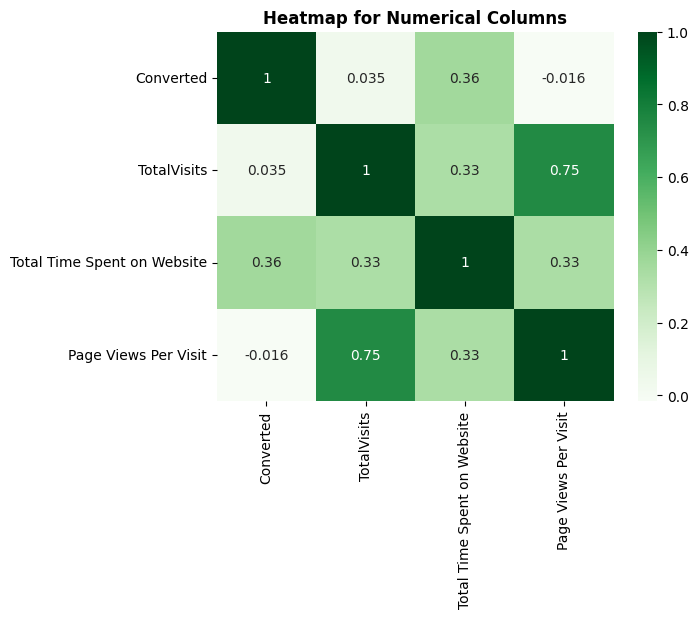

In [26]:
# Plot Heat Map for the numerical columns to check for the colinearity:
sns.heatmap(lead_data.corr(), cmap='Greens', annot=True)
plt.title('Heatmap for Numerical Columns', fontweight='bold')
plt.show()

**Note:** There is a correlation in between TotalVisits and Page Views Per Visit column.

# <div style="text-align: center;">4. Data preparation:</div>
---
1. Data Encoding
2. Train Test Split
3. Data Scaling

In [27]:
# View Final Dataset:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity
0,API,Messaging,No,0,0.0,0,0.0,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,No,Modified
4,Landing Page Submission,Search Engine,No,1,2.0,1428,1.0,No,Modified


### 5.1 Data Encoding:

In [28]:
# Replace Yes to 1 and No to 0:
lead_data = lead_data.replace(['Yes', 'No'], [1, 0])

In [29]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   A free copy of Mastering The Interview  9240 non-null   int64  
 8   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 649.8+ KB


In [30]:
# Now update string columns to numerical columns:
columns = [col for col in lead_data.columns if lead_data[col].dtype=='object']
lead_data_encoded = pd.get_dummies(lead_data, columns=columns, drop_first=True)
lead_data_encoded.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Campaigns,Lead Source_Direct Traffic,Lead Source_Messaging,Lead Source_Miscellaneous,Lead Source_Organic Search,Lead Source_Referrals,Lead Source_Search Engine,Lead Source_Social Media,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 5.2 Train Test Split:

In [31]:
# Seperate Target column and independent columns:
y = lead_data_encoded.pop('Converted')
X = lead_data_encoded

In [32]:
# Split the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Check for the shape of the data
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (6468, 32)
Shape of X_test (2772, 32)
Shape of y_train (6468,)
Shape of y_test (2772,)


### 5.3 Data Scaling:

In [34]:
lead_data_encoded.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Campaigns,Lead Source_Direct Traffic,Lead Source_Messaging,Lead Source_Miscellaneous,Lead Source_Organic Search,Lead Source_Referrals,Lead Source_Search Engine,Lead Source_Social Media,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [35]:
num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler =  MinMaxScaler()
X_train[num_var] = scaler.fit_transform(X_train[num_var])

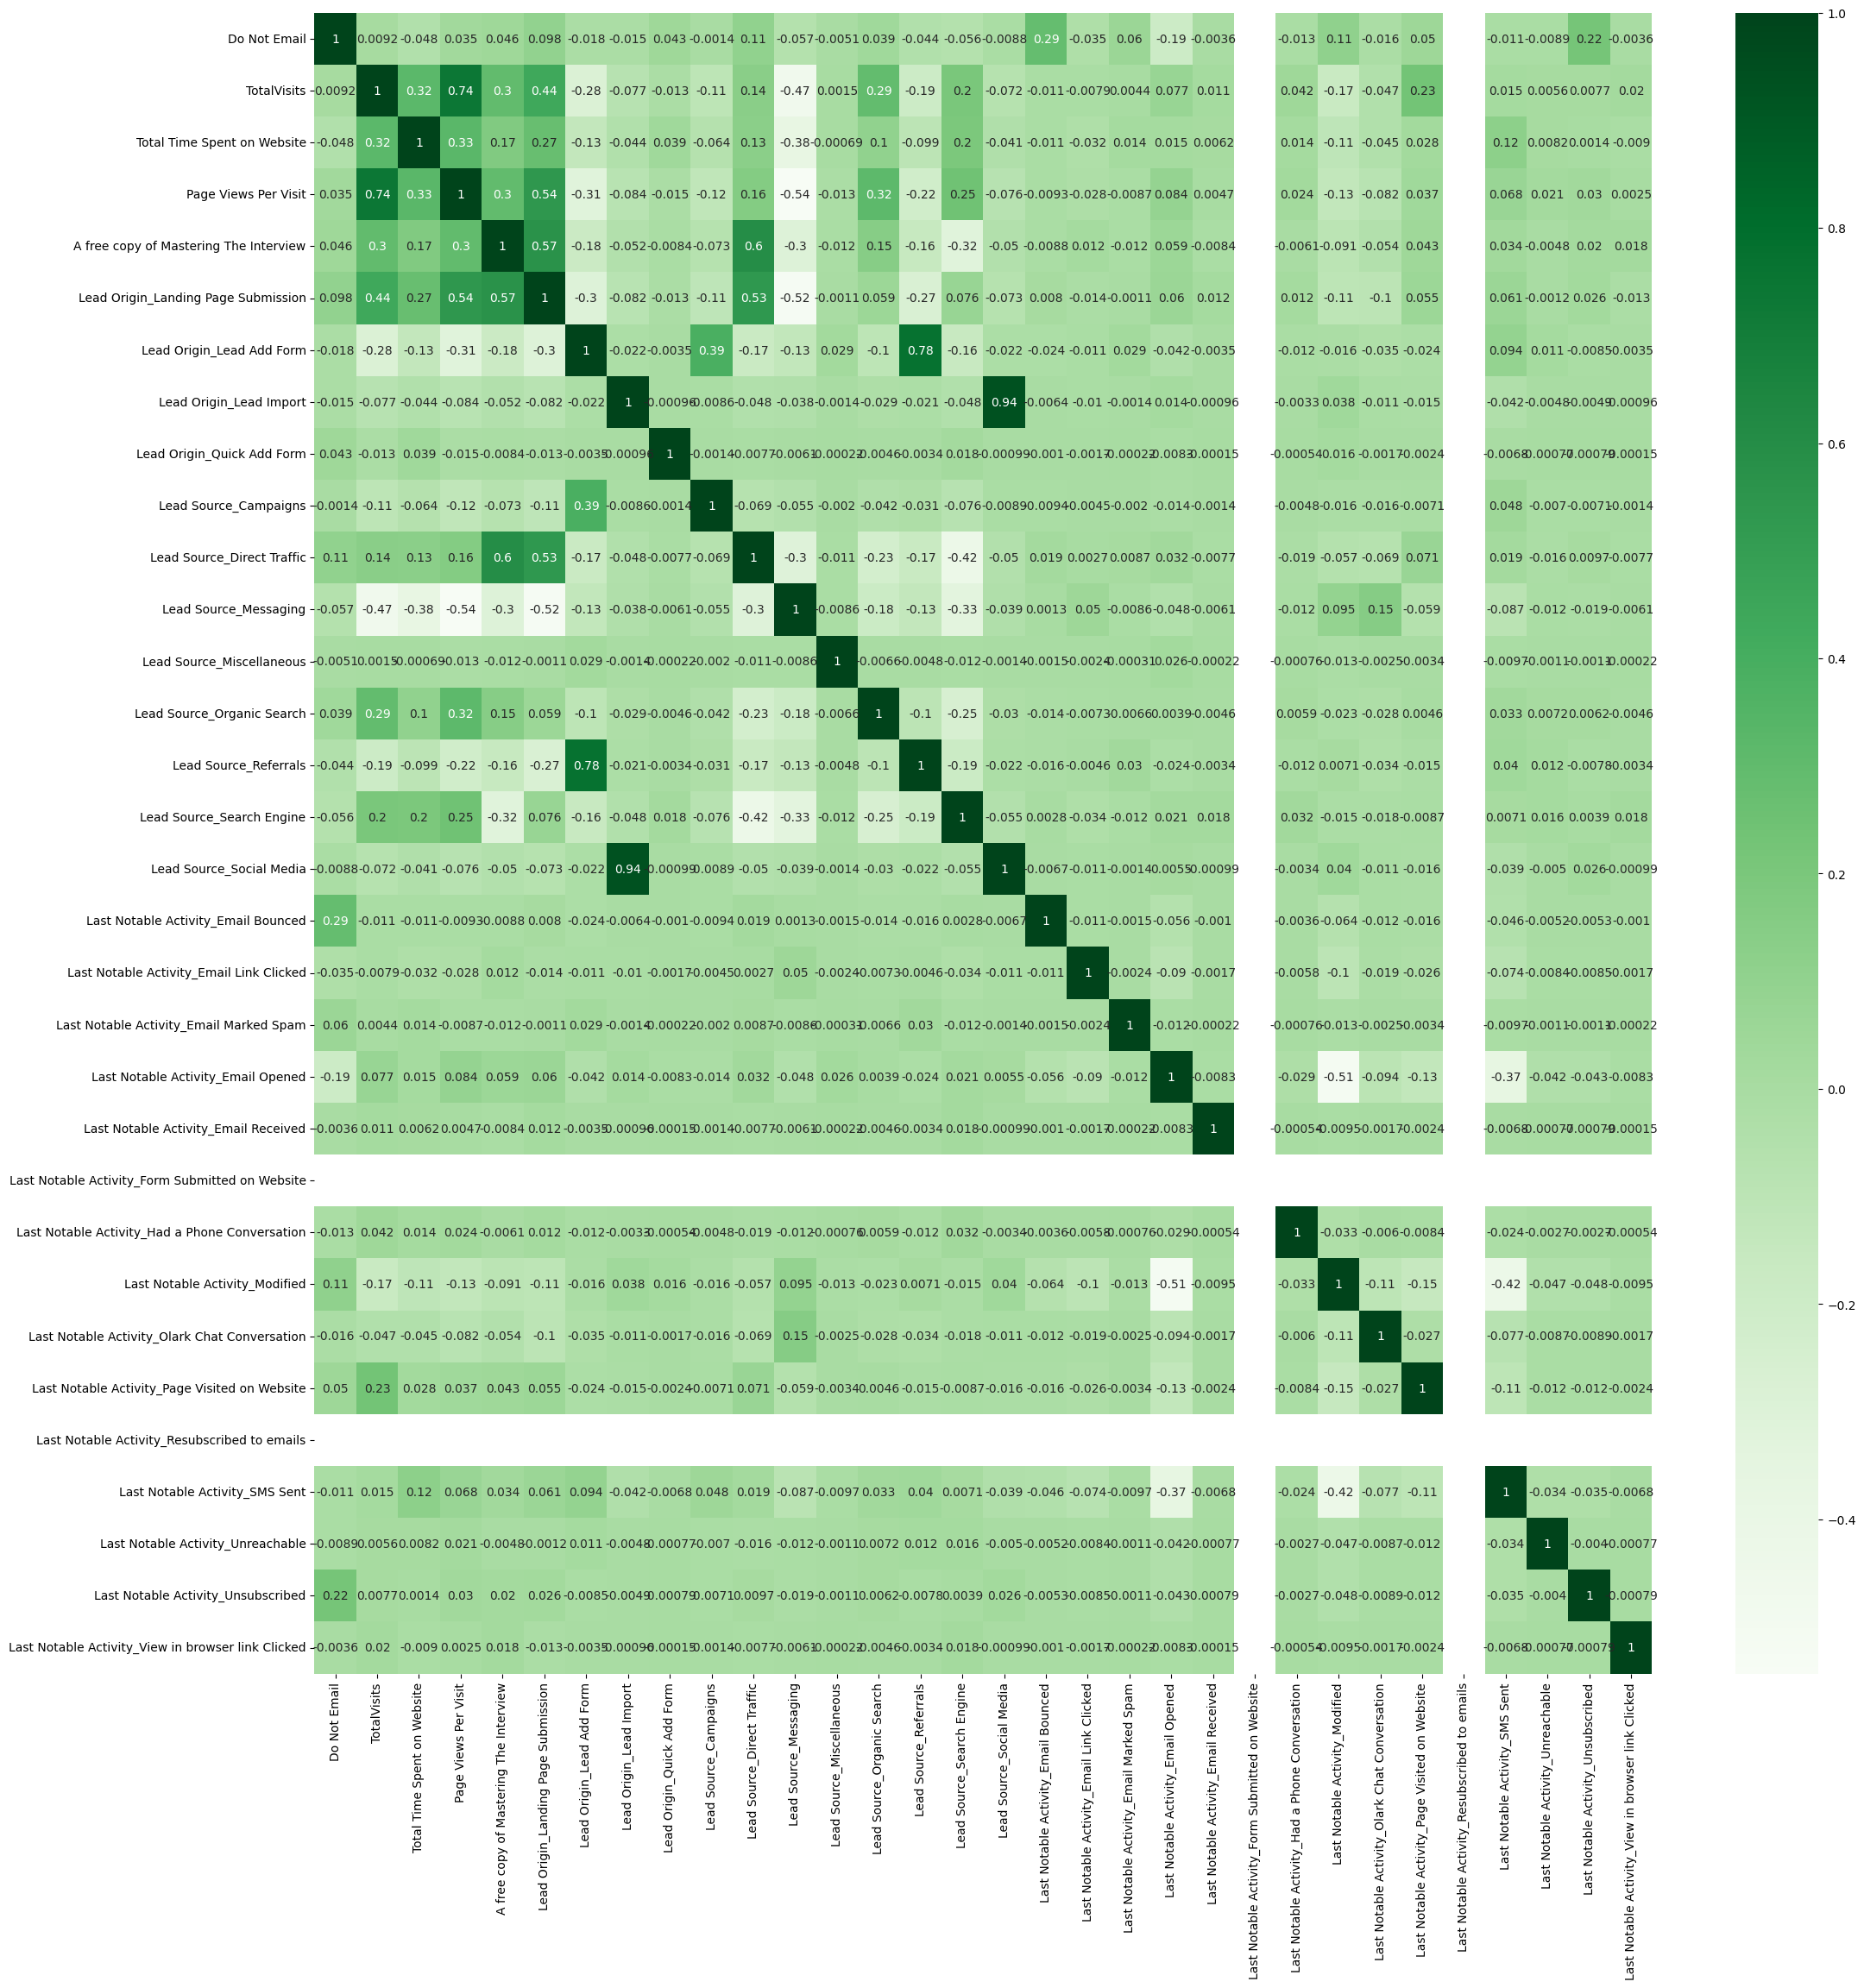

In [36]:
# Check for the correlation in the training columns:
plt.figure(figsize = (25,25))
sns.heatmap(X_train.corr(), cmap='Greens', annot=True)
plt.show()

In [37]:
# Drop 'Lead Origin_Lead Import', 'Lead Source_Social Media', 'Last Notable Activity_Form Submitted on Website', 'Last Notable Activity_Page Visited on Website', 'Lead Origin_Lead Add Form' and 'Lead Source_Referrals'from train and test dataset:
X_train.drop(columns=['Lead Origin_Lead Import', 'Lead Source_Social Media',
                     'Last Notable Activity_Form Submitted on Website', 'Last Notable Activity_Resubscribed to emails',
                     'Lead Origin_Lead Add Form', 'Lead Source_Referrals'], inplace=True)
X_test.drop(columns=['Lead Origin_Lead Import', 'Lead Source_Social Media',
                    'Last Notable Activity_Form Submitted on Website', 'Last Notable Activity_Resubscribed to emails',
                    'Lead Origin_Lead Add Form', 'Lead Source_Referrals'], inplace=True)

# <div style="text-align: center;">6. Model Training</div>
---
1. Removing non required Columns using RFE and P_values analysis.
2. Analyse the Models using statsmodel summary.
3. Build Final Model using Scikit Learn LogisticRegression while keeping required columns.

### Train temporary Model:

In [38]:
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=17)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 9),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Quick Add Form', False, 8),
 ('Lead Source_Campaigns', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Messaging', True, 1),
 ('Lead Source_Miscellaneous', False, 5),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Search Engine', True, 1),
 ('Last Notable Activity_Email Bounced', False, 6),
 ('Last Notable Activity_Email Link Clicked', False, 2),
 ('Last Notable Activity_Email Marked Spam', True, 1),
 ('Last Notable Activity_Email Opened', False, 3),
 ('Last Notable Activity_Email Received', False, 4),
 ('Last Notable Activity_Had a Phone Conversation', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Activity_Page Visited

In [39]:
col = X_train.columns[rfe.support_]
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)

logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3026.6
Date:                Tue, 21 May 2024   Deviance:                       6053.2
Time:                        17:51:49   Pearson chi2:                 6.64e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3271
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.6979      0.122      5.713      0.000       0.458       0.937
Do Not Email                                      -1.2183      0.158     -7.697      0.000      -1.529      -0.908
TotalVisits                                        1.0350      0.204      5.075      0.000       0.635       1.435
Total Time Spent on Website                        4.3474      0.156     27.910      0.000       4.042       4.653
Page Views Per Visit                              -1.5998      0.211     -7.568      0.000      -2.014      -1.186
Lead Source_Campaigns                              3.4351      1.020      3.369      0.001       1.437       5.433
Lead Source_Direct Traffic                        -2.6224      0.141    -18.580      0.000      -2.899      -2.346
Lead Source_Messaging                             -1.9103      0.135    -14.196      0.000      -2.174      -1.647
Lead Source_Organic Search                        -2.3218      0.165    -14.091      0.000      -2.645      -1.999
Lead Source_Search Engine                         -2.1976      0.138    -15.886      0.000      -2.469      -1.926
Last Notable Activity_Email Marked Spam           20.6472   1.22e+04      0.002      0.999   -2.38e+04    2.39e+04
Last Notable Activity_Had a Phone Conversation     3.3384      1.084      3.081      0.002       1.214       5.462
Last Notable Activity_Modified                    -0.6141      0.078     -7.842      0.000      -0.768      -0.461
Last Notable Activity_Olark Chat Conversation     -1.5174      0.314     -4.834      0.000      -2.133      -0.902
Last Notable Activity_Page Visited on Website     -0.4716      0.184     -2.557      0.011      -0.833      -0.110
Last Notable Activity_SMS Sent                     1.6161      0.084     19.293      0.000       1.452       1.780
Last Notable Activity_Unreachable                  2.1118      0.520      4.061      0.000       1.092       3.131
Last Notable Activity_Unsubscribed                 1.1525      0.517      2.227      0.026       0.138       2.167
==================================================================================================================
"""

In [40]:
# Drop Last Notable Activity_Email Marked Spam columns:
X_train.drop(columns='Last Notable Activity_Email Marked Spam', inplace=True)
X_train_sm2 = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial())
logm2 = logm2.fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3028.0
Date:                Tue, 21 May 2024   Deviance:                       6056.1
Time:                        17:51:49   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3268
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.7072      0.122      5.792      0.000       0.468       0.946
Do Not Email                                      -1.1939      0.157     -7.623      0.000      -1.501      -0.887
TotalVisits                                        1.0394      0.204      5.099      0.000       0.640       1.439
Total Time Spent on Website                        4.3508      0.156     27.945      0.000       4.046       4.656
Page Views Per Visit                              -1.6048      0.211     -7.593      0.000      -2.019      -1.191
Lead Source_Campaigns                              3.4251      1.019      3.360      0.001       1.427       5.423
Lead Source_Direct Traffic                        -2.6300      0.141    -18.636      0.000      -2.907      -2.353
Lead Source_Messaging                             -1.9177      0.135    -14.253      0.000      -2.181      -1.654
Lead Source_Organic Search                        -2.3307      0.165    -14.145      0.000      -2.654      -2.008
Lead Source_Search Engine                         -2.2059      0.138    -15.946      0.000      -2.477      -1.935
Last Notable Activity_Had a Phone Conversation     3.3374      1.084      3.079      0.002       1.213       5.461
Last Notable Activity_Modified                    -0.6181      0.078     -7.896      0.000      -0.772      -0.465
Last Notable Activity_Olark Chat Conversation     -1.5208      0.314     -4.844      0.000      -2.136      -0.906
Last Notable Activity_Page Visited on Website     -0.4768      0.184     -2.586      0.010      -0.838      -0.115
Last Notable Activity_SMS Sent                     1.6125      0.084     19.262      0.000       1.448       1.777
Last Notable Activity_Unreachable                  2.1094      0.520      4.057      0.000       1.090       3.128
Last Notable Activity_Unsubscribed                 1.1263      0.517      2.178      0.029       0.113       2.140
==================================================================================================================
"""

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,Page Views Per Visit,6.78
1,TotalVisits,5.47
8,Lead Source_Search Engine,3.32
5,Lead Source_Direct Traffic,2.84
7,Lead Source_Organic Search,2.32
2,Total Time Spent on Website,2.22
10,Last Notable Activity_Modified,1.93
13,Last Notable Activity_SMS Sent,1.58
6,Lead Source_Messaging,1.41
0,Do Not Email,1.20


In [42]:
# Drop Column Last Notable Activity_Unsubscribed
X_train.drop(columns='Page Views Per Visit', inplace=True)
X_train_sm3 = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial())
logm3 = logm3.fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3057.6
Date:                Tue, 21 May 2024   Deviance:                       6115.2
Time:                        17:51:50   Pearson chi2:                 6.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3206
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.6266      0.121      5.182      0.000       0.390       0.864
Do Not Email                                      -1.1975      0.156     -7.688      0.000      -1.503      -0.892
TotalVisits                                        0.1368      0.167      0.822      0.411      -0.190       0.463
Total Time Spent on Website                        4.3086      0.155     27.841      0.000       4.005       4.612
Lead Source_Campaigns                              3.4894      1.019      3.423      0.001       1.492       5.487
Lead Source_Direct Traffic                        -2.8513      0.139    -20.551      0.000      -3.123      -2.579
Lead Source_Messaging                             -1.8484      0.134    -13.834      0.000      -2.110      -1.587
Lead Source_Organic Search                        -2.6506      0.160    -16.584      0.000      -2.964      -2.337
Lead Source_Search Engine                         -2.4485      0.135    -18.090      0.000      -2.714      -2.183
Last Notable Activity_Had a Phone Conversation     3.3458      1.076      3.111      0.002       1.238       5.454
Last Notable Activity_Modified                    -0.6023      0.078     -7.733      0.000      -0.755      -0.450
Last Notable Activity_Olark Chat Conversation     -1.4142      0.309     -4.574      0.000      -2.020      -0.808
Last Notable Activity_Page Visited on Website     -0.2217      0.179     -1.241      0.215      -0.572       0.129
Last Notable Activity_SMS Sent                     1.5702      0.083     18.966      0.000       1.408       1.733
Last Notable Activity_Unreachable                  2.0329      0.521      3.899      0.000       1.011       3.055
Last Notable Activity_Unsubscribed                 0.9952      0.522      1.908      0.056      -0.027       2.017
==================================================================================================================
"""

In [43]:
# Drop Column TotalVisits
X_train.drop(columns='TotalVisits', inplace=True)
X_train_sm4 = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm4, family=sm.families.Binomial())
logm4 = logm4.fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3057.9
Date:                Tue, 21 May 2024   Deviance:                       6115.8
Time:                        17:51:50   Pearson chi2:                 6.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3205
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.6403      0.120      5.345      0.000       0.405       0.875
Do Not Email                                      -1.2004      0.156     -7.708      0.000      -1.506      -0.895
Total Time Spent on Website                        4.3217      0.154     28.061      0.000       4.020       4.624
Lead Source_Campaigns                              3.4807      1.019      3.415      0.001       1.483       5.478
Lead Source_Direct Traffic                        -2.8236      0.134    -21.001      0.000      -3.087      -2.560
Lead Source_Messaging                             -1.8556      0.133    -13.918      0.000      -2.117      -1.594
Lead Source_Organic Search                        -2.6046      0.150    -17.417      0.000      -2.898      -2.311
Lead Source_Search Engine                         -2.4182      0.130    -18.587      0.000      -2.673      -2.163
Last Notable Activity_Had a Phone Conversation     3.3748      1.077      3.134      0.002       1.264       5.486
Last Notable Activity_Modified                    -0.6087      0.077     -7.856      0.000      -0.761      -0.457
Last Notable Activity_Olark Chat Conversation     -1.4087      0.309     -4.565      0.000      -2.014      -0.804
Last Notable Activity_Page Visited on Website     -0.1898      0.174     -1.088      0.276      -0.531       0.152
Last Notable Activity_SMS Sent                     1.5672      0.083     18.948      0.000       1.405       1.729
Last Notable Activity_Unreachable                  2.0341      0.522      3.900      0.000       1.012       3.056
Last Notable Activity_Unsubscribed                 0.9943      0.521      1.908      0.056      -0.027       2.016
==================================================================================================================
"""

In [44]:
# Drop Column Last Notable Activity_Page Visited on Website
X_train.drop(columns='Last Notable Activity_Page Visited on Website', inplace=True)
X_train_sm5 = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm5, family=sm.families.Binomial())
logm5 = logm5.fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3058.5
Date:                Tue, 21 May 2024   Deviance:                       6117.0
Time:                        17:51:50   Pearson chi2:                 6.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3204
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.6264      0.119      5.258      0.000       0.393       0.860
Do Not Email                                      -1.2084      0.155     -7.776      0.000      -1.513      -0.904
Total Time Spent on Website                        4.3185      0.154     28.057      0.000       4.017       4.620
Lead Source_Campaigns                              3.4807      1.019      3.415      0.001       1.483       5.479
Lead Source_Direct Traffic                        -2.8281      0.134    -21.038      0.000      -3.092      -2.565
Lead Source_Messaging                             -1.8557      0.133    -13.916      0.000      -2.117      -1.594
Lead Source_Organic Search                        -2.6068      0.150    -17.431      0.000      -2.900      -2.314
Lead Source_Search Engine                         -2.4201      0.130    -18.600      0.000      -2.675      -2.165
Last Notable Activity_Had a Phone Conversation     3.3916      1.077      3.150      0.002       1.281       5.502
Last Notable Activity_Modified                    -0.5918      0.076     -7.790      0.000      -0.741      -0.443
Last Notable Activity_Olark Chat Conversation     -1.3927      0.308     -4.519      0.000      -1.997      -0.789
Last Notable Activity_SMS Sent                     1.5846      0.081     19.511      0.000       1.425       1.744
Last Notable Activity_Unreachable                  2.0509      0.521      3.933      0.000       1.029       3.073
Last Notable Activity_Unsubscribed                 1.0197      0.521      1.959      0.050      -0.001       2.040
==================================================================================================================
"""

In [45]:
# Drop Column Last Notable Activity_Unsubscribed
X_train.drop(columns='Last Notable Activity_Unsubscribed', inplace=True)
X_train_sm6 = sm.add_constant(X_train)
logm6 = sm.GLM(y_train, X_train_sm6, family=sm.families.Binomial())
logm6 = logm6.fit()
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3060.3
Date:                Tue, 21 May 2024   Deviance:                       6120.6
Time:                        17:51:50   Pearson chi2:                 6.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3200
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.6342      0.119      5.329      0.000       0.401       0.867
Do Not Email                                      -1.1324      0.148     -7.641      0.000      -1.423      -0.842
Total Time Spent on Website                        4.3212      0.154     28.076      0.000       4.020       4.623
Lead Source_Campaigns                              3.4698      1.019      3.405      0.001       1.473       5.467
Lead Source_Direct Traffic                        -2.8306      0.134    -21.075      0.000      -3.094      -2.567
Lead Source_Messaging                             -1.8572      0.133    -13.934      0.000      -2.118      -1.596
Lead Source_Organic Search                        -2.6100      0.149    -17.461      0.000      -2.903      -2.317
Lead Source_Search Engine                         -2.4220      0.130    -18.624      0.000      -2.677      -2.167
Last Notable Activity_Had a Phone Conversation     3.3857      1.077      3.144      0.002       1.275       5.496
Last Notable Activity_Modified                    -0.6025      0.076     -7.955      0.000      -0.751      -0.454
Last Notable Activity_Olark Chat Conversation     -1.4016      0.308     -4.547      0.000      -2.006      -0.797
Last Notable Activity_SMS Sent                     1.5725      0.081     19.443      0.000       1.414       1.731
Last Notable Activity_Unreachable                  2.0414      0.521      3.921      0.000       1.021       3.062
==================================================================================================================
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,Total Time Spent on Website,2.18
6,Lead Source_Search Engine,1.93
8,Last Notable Activity_Modified,1.83
3,Lead Source_Direct Traffic,1.75
10,Last Notable Activity_SMS Sent,1.51
4,Lead Source_Messaging,1.37
5,Lead Source_Organic Search,1.37
0,Do Not Email,1.13
9,Last Notable Activity_Olark Chat Conversation,1.07
2,Lead Source_Campaigns,1.03


**Note:** All the VIF and P_values are in the correct range now we can evaluate our Training model:

### Training Model Evaluation:

In [47]:
# Do the prediction
y_train_pred = logm6.predict(X_train_sm6)
# Reshape the o/p
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22741344, 0.59817927, 0.52801888, 0.26321702, 0.44432548,
       0.13877758, 0.61812239, 0.48383336, 0.24456824, 0.13877758])

In [48]:
# Create a dataframe
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['UserID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,UserID
0,0,0.227413,4715
1,1,0.598179,7132
2,0,0.528019,8954
3,0,0.263217,5283
4,0,0.444325,3003


In [49]:
# For now just take 0.5 as a middel value to fill predicted column:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.50 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,UserID,Predicted
0,0,0.227413,4715,0
1,1,0.598179,7132,1
2,0,0.528019,8954,1
3,0,0.263217,5283,0
4,0,0.444325,3003,0


In [50]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

<IPython.core.display.Javascript object>

[[3358  626]
 [ 804 1680]]


In [51]:
# Actual/Predicted          Non_Conversion    Conversion
        # Non_Conversion        3358            626
        # Conversion            804            1680  

In [52]:
# Check for the accurace Score
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7789115646258503

#### Checking for the other metrics:

In [53]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [54]:
logreg_all_metrics(confusion)

True Negative                    :  3358
True Positive                    :  1680
False Negative                   :  804
False Positve                    :  626
Model Accuracy                   :  0.7789
Model Sensitivity                :  0.6763
Model Specificity                :  0.8429
Model Precision                  :  0.7285
Model Recall                     :  0.6763
Model True Positive Rate (TPR)   :  0.6763
Model False Positive Rate (FPR)  :  0.1571


#### Plotting ROC Curve:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

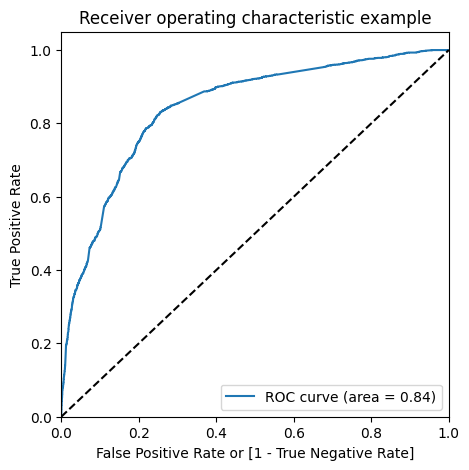

In [55]:
# Plot ROC Curve:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Finding Optimal Cutoff Point:
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [56]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,UserID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.227413,4715,0,1,1,1,0,0,0,0,0,0,0
1,1,0.598179,7132,1,1,1,1,1,1,1,0,0,0,0
2,0,0.528019,8954,1,1,1,1,1,1,1,0,0,0,0
3,0,0.263217,5283,0,1,1,1,0,0,0,0,0,0,0
4,0,0.444325,3003,0,1,1,1,1,1,0,0,0,0,0


In [57]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.494280  0.976248  0.193775
0.2   0.2  0.711348  0.900564  0.593373
0.3   0.3  0.777520  0.823671  0.748745
0.4   0.4  0.782158  0.764895  0.792922
0.5   0.5  0.778912  0.676329  0.842871
0.6   0.6  0.750309  0.502818  0.904618
0.7   0.7  0.730983  0.382045  0.948544
0.8   0.8  0.715213  0.303543  0.971888
0.9   0.9  0.679344  0.184380  0.987952


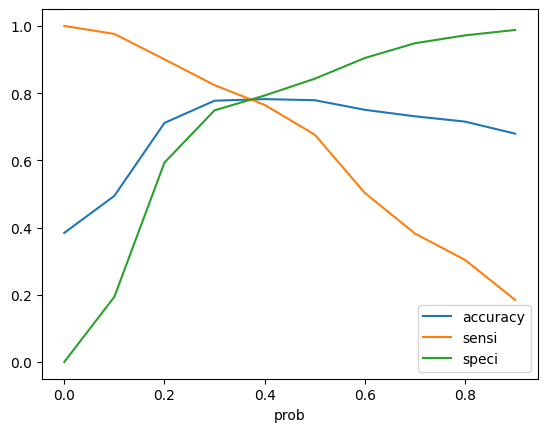

In [58]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the curve above, 0.37 is the optimum point to take it as a cutoff probability.**

In [59]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,UserID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.227413,4715,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.598179,7132,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.528019,8954,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.263217,5283,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.444325,3003,0,1,1,1,1,1,0,0,0,0,0,1


In [60]:
# Now lets check for overall metrics with final_predicted
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
logreg_all_metrics(confusion2)

<IPython.core.display.Javascript object>

True Negative                    :  3100
True Positive                    :  1957
False Negative                   :  527
False Positve                    :  884
Model Accuracy                   :  0.7818
Model Sensitivity                :  0.7878
Model Specificity                :  0.7781
Model Precision                  :  0.6888
Model Recall                     :  0.7878
Model True Positive Rate (TPR)   :  0.7878
Model False Positive Rate (FPR)  :  0.2219


#### Precision and Recall Tradeoff:

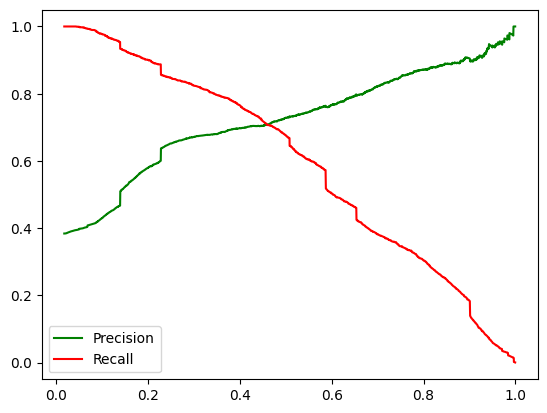

In [61]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-", label='Precision')
plt.plot(thresholds, r[:-1], "r-", label='Recall')
plt.legend()
plt.show()

**Note:** Intersection of Precision and Recall is 0.46 now check for the metrices for this value

In [62]:
y_train_pred_final['precision_recall_prediction'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.47 else 0)
y_train_pred_final.drop(columns=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], inplace=True)
y_train_pred_final.head()

,Converted,Conversion_Prob,UserID,Predicted,final_predicted,precision_recall_prediction
0,0,0.227413,4715,0,0,0
1,1,0.598179,7132,1,1,1
2,0,0.528019,8954,1,1,1
3,0,0.263217,5283,0,0,0
4,0,0.444325,3003,0,1,0


In [63]:
# Now lets check for overall metrics with final_predicted
confusion3 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.precision_recall_prediction )
logreg_all_metrics(confusion3)

True Negative                    :  3286
True Positive                    :  1748
False Negative                   :  736
False Positve                    :  698
Model Accuracy                   :  0.7783
Model Sensitivity                :  0.7037
Model Specificity                :  0.8248
Model Precision                  :  0.7146
Model Recall                     :  0.7037
Model True Positive Rate (TPR)   :  0.7037
Model False Positive Rate (FPR)  :  0.1752


**Note:** In specificity and Sensitivity tradeoff our model is giving more accurate predictions than Precision-Recall Tradeoff so I will use 0.37 as my cutoff point.

### Add Lead Score to the dataset:

In [64]:
y_train_pred_final.head()

,Converted,Conversion_Prob,UserID,Predicted,final_predicted,precision_recall_prediction
0,0,0.227413,4715,0,0,0
1,1,0.598179,7132,1,1,1
2,0,0.528019,8954,1,1,1
3,0,0.263217,5283,0,0,0
4,0,0.444325,3003,0,1,0


In [65]:
y_train_pred_final.drop(columns=['Predicted', 'precision_recall_prediction'], inplace=True)
y_train_pred_final['Lead_Score'] = y_train_pred_final['Conversion_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,UserID,final_predicted,Lead_Score
0,0,0.227413,4715,0,23
1,1,0.598179,7132,1,60
2,0,0.528019,8954,1,53
3,0,0.263217,5283,0,26
4,0,0.444325,3003,1,44


**Observation:** Evaluation Metrics details:
- For train Data
    - Accuracy: 78.18%
    - Sensitivity: 78.78%
    - Specificity: 77.81%

# <div style="text-align: center;">7. Model Prediction</div>
---

In [66]:
num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_test[num_var] = scaler.transform(X_test[num_var])

In [67]:
# Fetch the train data columns:
cols = X_train.columns

# Use only those columns in the test set which is in the training set
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Campaigns,Lead Source_Direct Traffic,Lead Source_Messaging,Lead Source_Organic Search,Lead Source_Search Engine,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4608,0,0.110915,0,0,0,0,1,0,0,0,0,0
7935,1,0.408891,0,1,0,0,0,0,1,0,0,0
4043,1,0.000880,0,1,0,0,0,0,1,0,0,0
7821,0,0.142165,0,1,0,0,0,0,0,0,0,0
856,0,0.088468,0,0,0,0,1,0,0,0,0,0


In [68]:
# Prediction on test data
# Add Constant to the test dataset
X_test_sm = sm.add_constant(X_test)

# Making Prediction
y_test_pred = logm6.predict(X_test_sm)

#reshape the result
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.21274111, 0.10299613, 0.01931282, 0.17050694, 0.19694779,
       0.07933704, 0.97222926, 0.14432259, 0.35934275, 0.50792297])

In [69]:
# Create the dataframe
y_test_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_prob':y_test_pred, 'UserID':y_test.index})
y_test_final.head()

,Converted,Conversion_prob,UserID
0,1,0.212741,4608
1,0,0.102996,7935
2,0,0.019313,4043
3,0,0.170507,7821
4,0,0.196948,856


In [70]:
# Taking sensitivity and specificity cutoff point
y_test_final['Final_Predicted'] = y_test_final.Conversion_prob.map(lambda x: 1 if x > 0.37 else 0)
y_test_final.head()

,Converted,Conversion_prob,UserID,Final_Predicted
0,1,0.212741,4608,0
1,0,0.102996,7935,0
2,0,0.019313,4043,0
3,0,0.170507,7821,0
4,0,0.196948,856,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

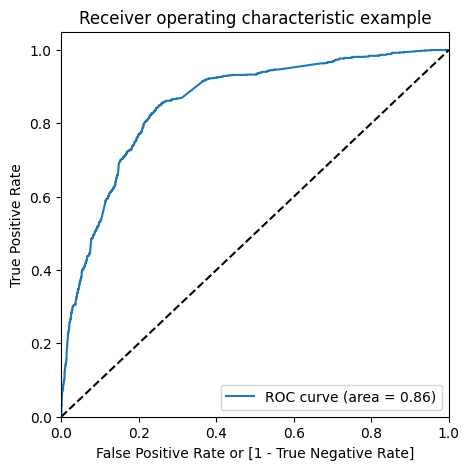

In [71]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_test_final["Converted"], y_test_final["Conversion_prob"], drop_intermediate = False )
draw_roc(y_test_final["Converted"], y_test_final["Conversion_prob"])

In [73]:
test_confusion = confusion_matrix(y_test_final.Converted, y_test_final.Final_Predicted )
logreg_all_metrics(test_confusion)

True Negative                    :  1309
True Positive                    :  882
False Negative                   :  195
False Positve                    :  386
Model Accuracy                   :  0.7904
Model Sensitivity                :  0.8189
Model Specificity                :  0.7723
Model Precision                  :  0.6956
Model Recall                     :  0.8189
Model True Positive Rate (TPR)   :  0.8189
Model False Positive Rate (FPR)  :  0.2277


In [74]:
# Add lead_score to the test results
y_test_final['Lead_Score'] = y_test_final['Conversion_prob'].map( lambda x: round(x*100))
y_test_final.head()

,Converted,Conversion_prob,UserID,Final_Predicted,Lead_Score
0,1,0.212741,4608,0,21
1,0,0.102996,7935,0,10
2,0,0.019313,4043,0,2
3,0,0.170507,7821,0,17
4,0,0.196948,856,0,20


**Note:** Higher the lead score more are the chances of conversion.

In [75]:
# features and their coefficicent from final model
parameters=logm6.params.sort_values(ascending=False)
parameters

Total Time Spent on Website                       4.321250
Lead Source_Campaigns                             3.469814
Last Notable Activity_Had a Phone Conversation    3.385652
Last Notable Activity_Unreachable                 2.041369
Last Notable Activity_SMS Sent                    1.572506
const                                             0.634200
Last Notable Activity_Modified                   -0.602506
Do Not Email                                     -1.132411
Last Notable Activity_Olark Chat Conversation    -1.401574
Lead Source_Messaging                            -1.857175
Lead Source_Search Engine                        -2.421975
Lead Source_Organic Search                       -2.609960
Lead Source_Direct Traffic                       -2.830572
dtype: float64

# <div style="text-align: center;">8. Conclusion</div>
---
- **For train Data:**
    - Accuracy: 78.18%
    - Sensitivity: 78.78%
    - Specificity: 77.81%
    
- **For Test Data:**
    - Accuracy: 79.04%
    - Sensitivity: 81.89%
    - Specificity: 77.23%

**Note:**
- In this business scenario, sensitivity (recall) is the most crucial evaluation metric. It measures the model's ability to correctly identify positive instances, ensuring that we capture as many true positives as possible, which is vital for the success and effectiveness of our strategy.
- In terms of sensitivity, our model has achieved an 81.89% success rate in predicting users who can be converted, effectively identifying the majority of potential conversions.